In [1]:
import logomaker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
# global ylim
ylim = [-1.5, 1.5]
# +Rif sample names
pRif_sample_names = ['CP49', 'CP50', 'CP51']
# -Rif sample names
noRif_sample_names = ['CP52', 'CP53', 'CP54']

#### Template logo for 2022 data

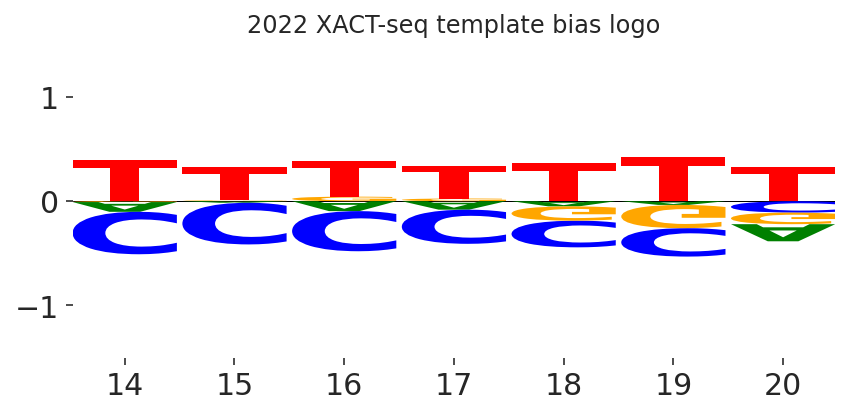

In [3]:
template_weight_df = pd.read_csv('./2022_XACT_seq_data/template_weight_sigma_df.csv.gz')
fig, ax = plt.subplots(1,1,figsize=(6,3))
template_weight_df.index = template_weight_df.index+14
template_bias_logo = logomaker.Logo(template_weight_df,ax=ax)
template_bias_logo.style_spines(visible=False)
ax.set_title(f'2022 XACT-seq template bias logo');
ax.set_ylim(ylim)
ax.set_xticks(np.arange(14,21))
plt.tight_layout()
plt.savefig('./2022_XACT_seq_figs/2022_template_bias.pdf')

In [4]:
# Helper function to plot logos for each sample for signle A-site position
def plot_signle_pos_logo(ax, a_loc, df, num_reads, sample_name, 
                         ylim, center_values=True, flip_below=False):
    seqs = df['pe']
    fg_ct = df[str(a_loc)].values
    n_reads = num_reads[str(a_loc)]
    fg_mat = logomaker.alignment_to_matrix(sequences=seqs, counts=fg_ct,
                                           pseudocount=1)
    enrich_mat = np.log2(fg_mat)
    # Start at +14 instead of 0 for the enrichement matrix
    enrich_mat.index = enrich_mat.index+14
    logo = logomaker.Logo(enrich_mat, 
                          center_values=center_values, 
                          ax=ax,
                          flip_below=flip_below)
    logo.style_spines(visible=False)
    ax.set_ylim(ylim)
    x_loc = a_loc + 5
    title = f'{sample_name}\ncross link +{x_loc}\n A-site +{a_loc} \n num reads {int(n_reads):,}'
    ax.set_title(title)
    logo.highlight_position_range(int(x_loc)-2, int(x_loc)+2,
                                  color='lavender',
                                  alpha=1, linewidth=1)
    logo.highlight_position_range(int(x_loc)-7, int(x_loc)-4,
                                  color='bisque',
                                  alpha=1, linewidth=1)
    ax.set_xticks(np.arange(14,21))
        

#### noRif 2022 rescaled (final) logos for +16 position

> Reading sample CP52
> Reading sample CP53
> Reading sample CP54


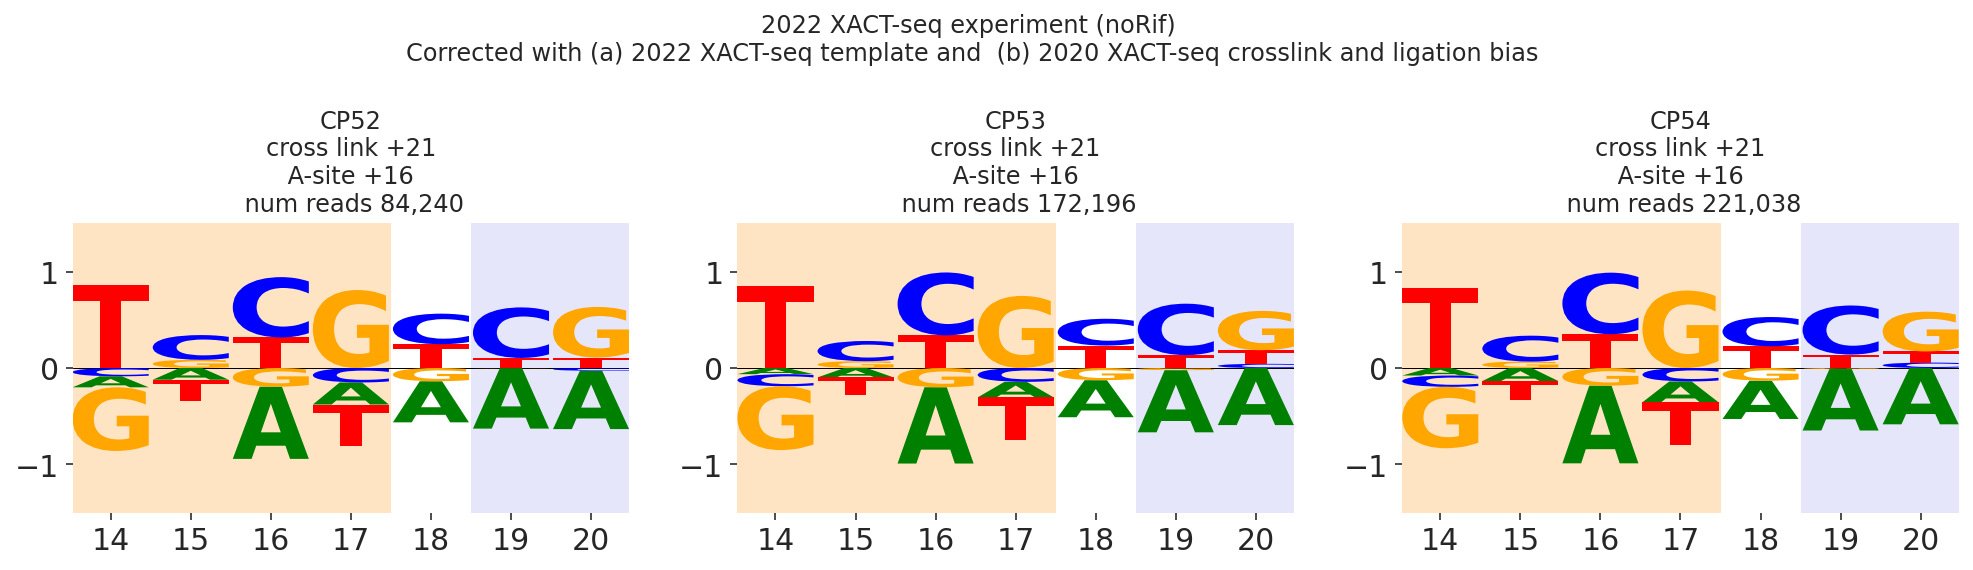

In [5]:
# Draw the rescaled logos for all the replicates for the position +16
a_loc = 16
fig, axs = plt.subplots(1,3, figsize=(14,4))

for k, sample_name in enumerate(noRif_sample_names):
    print(f'> Reading sample {sample_name}')
    CP_df = pd.read_csv(f'./2022_XACT_seq_data/{sample_name}_rescaled.csv.gz')
    # find number of reads for each position
    num_reads = CP_df.sum(numeric_only=True).to_frame().T
    ax = axs[k]
    plot_signle_pos_logo(ax=ax, a_loc=a_loc, df=CP_df, 
                         num_reads=num_reads, 
                         sample_name=sample_name, 
                         ylim=ylim)

title = (f"2022 XACT-seq experiment (noRif) \n"
          "Corrected with (a) 2022 XACT-seq template and  "
          "(b) 2020 XACT-seq crosslink and ligation bias")
plt.suptitle(title)
plt.tight_layout()
plt.savefig('./2022_XACT_seq_figs/2022_Asite_16_all_replicates.pdf')

#### Global logo averaged across the replicates

> Reading global logo for CP52
> Reading global logo for CP53
> Reading global logo for CP54


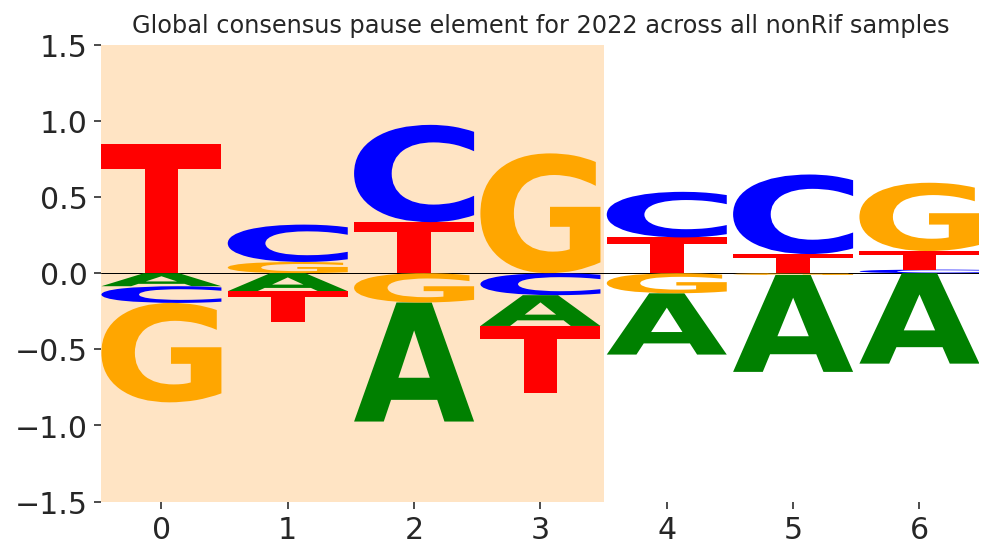

In [6]:
enrich_7nt_ave = 0
for k, sample_name in enumerate(noRif_sample_names):
    print(f'> Reading global logo for {sample_name}')
    enrich_7nt = pd.read_csv(f'./2022_XACT_seq_data/global_logo_{sample_name}.csv.gz')
    enrich_7nt_ave = enrich_7nt_ave + enrich_7nt
enrich_7nt_ave = enrich_7nt_ave/len(noRif_sample_names)
fig, ax = plt.subplots(1,1, figsize=(7,4))
logo = logomaker.Logo(enrich_7nt_ave, center_values=True, 
                      flip_below=False, ax=ax)
logo.style_spines(visible=False)
ax.set_ylim(ylim)
logo.highlight_position_range(0,3,
                          color='bisque',
                          alpha=1, linewidth=1)
ax.set_title(f'Global consensus pause element for 2022 across all nonRif samples')
plt.tight_layout()
plt.savefig('./2022_XACT_seq_figs/2022_global_logo_Asite_16.pdf')

### Plot final read counts for samples

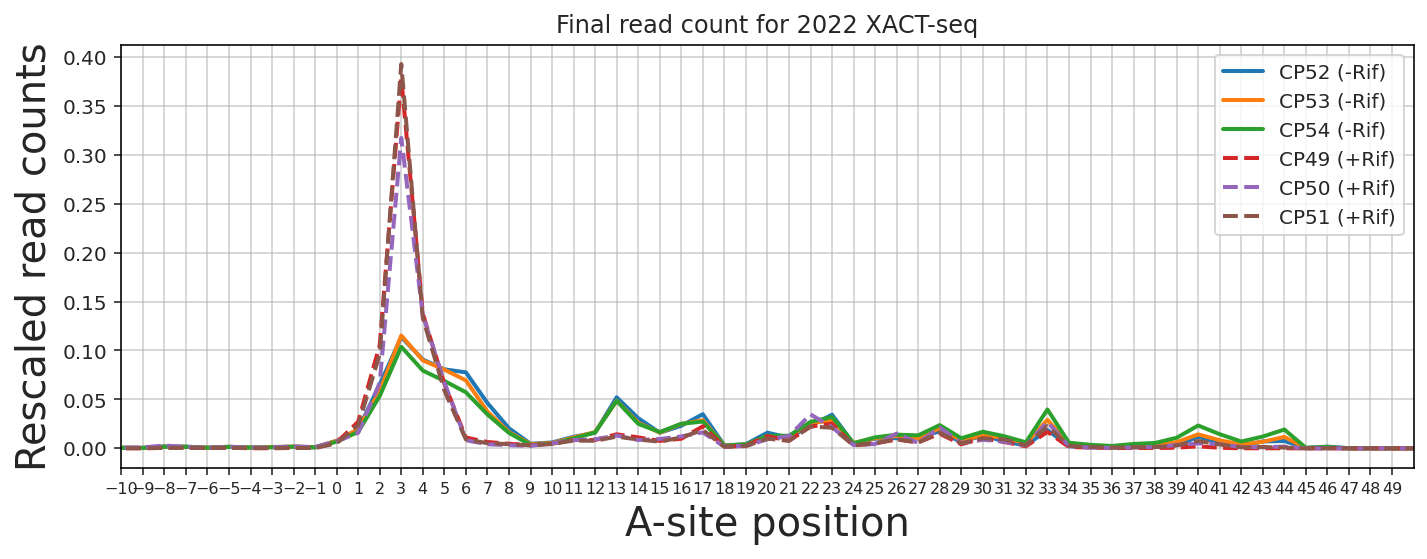

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

for k, sample_name in enumerate(noRif_sample_names):
    read_counts = pd.read_csv(f'./2022_XACT_seq_data/rescale_counts_{sample_name}.csv.gz')
    x = np.array(read_counts.columns.to_list(), dtype=np.int64)
    y = read_counts.values.flatten()
    sum_y = np.sum(y)
    ax.plot(x, y/sum_y, label=f'{sample_name} (-Rif)',lw=2)

    
for k, sample_name in enumerate(pRif_sample_names):
    read_counts = pd.read_csv(f'./2022_XACT_seq_data/rescale_counts_{sample_name}.csv.gz')
    x = np.array(read_counts.columns.to_list(), dtype=np.int64)
    y = read_counts.values.flatten()
    sum_y = np.sum(y)
    ax.plot(x, y/sum_y, '--', label=f'{sample_name} (+Rif)', lw=2)

ax.legend(frameon=True)
ax.set_ylabel('Rescaled read counts')
ax.set_xlabel('A-site position')
ax.set_xlim([-10, 50])
ax.set_xticks(np.arange(-10,50));
ax.tick_params(axis='x', labelsize= 8)
ax.tick_params(axis='y', labelsize= 10)
ax.grid(alpha=0.6)
plt.title('Final read count for 2022 XACT-seq')
plt.tight_layout()
plt.savefig('./2022_XACT_seq_figs/2022_readcount_histogram_all_replicates.pdf')

### Plot rescaled read count for wild type TTCGCT

> Reading sample CP52
> Reading sample CP53
> Reading sample CP54
> Reading sample CP49
> Reading sample CP50
> Reading sample CP51


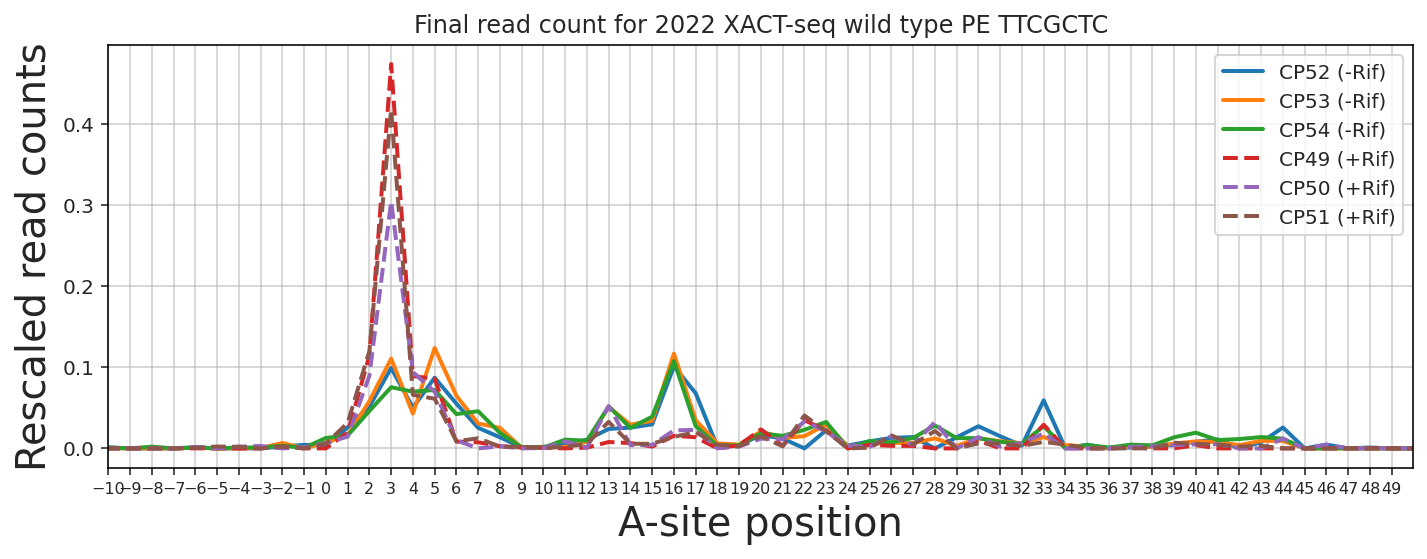

In [8]:
wild_type_seq = 'TTCGCTC'
fig, ax = plt.subplots(1,1, figsize=(10,4))

for k, sample_name in enumerate(noRif_sample_names):
    print(f'> Reading sample {sample_name}')
    CP_df = pd.read_csv(f'./2022_XACT_seq_data/{sample_name}_rescaled.csv.gz')
    df = CP_df[CP_df['pe']==wild_type_seq]
    x = np.array(df.columns.to_list()[1:], dtype=np.int64)
    y = np.array(df.values[:,1:], dtype=np.float64)
    sum_y = np.sum(y)
    ax.plot(x,y.flatten()/sum_y, label=f'{sample_name} (-Rif)',lw=2)

for k, sample_name in enumerate(pRif_sample_names):
    print(f'> Reading sample {sample_name}')
    CP_df = pd.read_csv(f'./2022_XACT_seq_data/{sample_name}_rescaled.csv.gz')
    df = CP_df[CP_df['pe']==wild_type_seq]
    x = np.array(df.columns.to_list()[1:], dtype=np.int64)
    y = np.array(df.values[:,1:], dtype=np.float64)
    sum_y = np.sum(y)
    ax.plot(x,y.flatten()/sum_y, '--', label=f'{sample_name} (+Rif)',lw=2)

ax.set_ylabel('Rescaled read counts')
ax.set_xlabel('A-site position')

ax.set_xticks(np.arange(-10,50));
plt.xlim(xmin=-10, xmax=50)
ax.tick_params(axis='x', labelsize= 8)
ax.tick_params(axis='y', labelsize= 10)
ax.legend(frameon=True)
ax.grid(alpha=0.6)
plt.title(f'Final read count for 2022 XACT-seq wild type PE {wild_type_seq}')
plt.tight_layout()
plt.savefig('./2022_XACT_seq_figs/2022_readcount_histogram_wildtype.pdf')

> Reading sample CP52
> Reading sample CP53
> Reading sample CP54


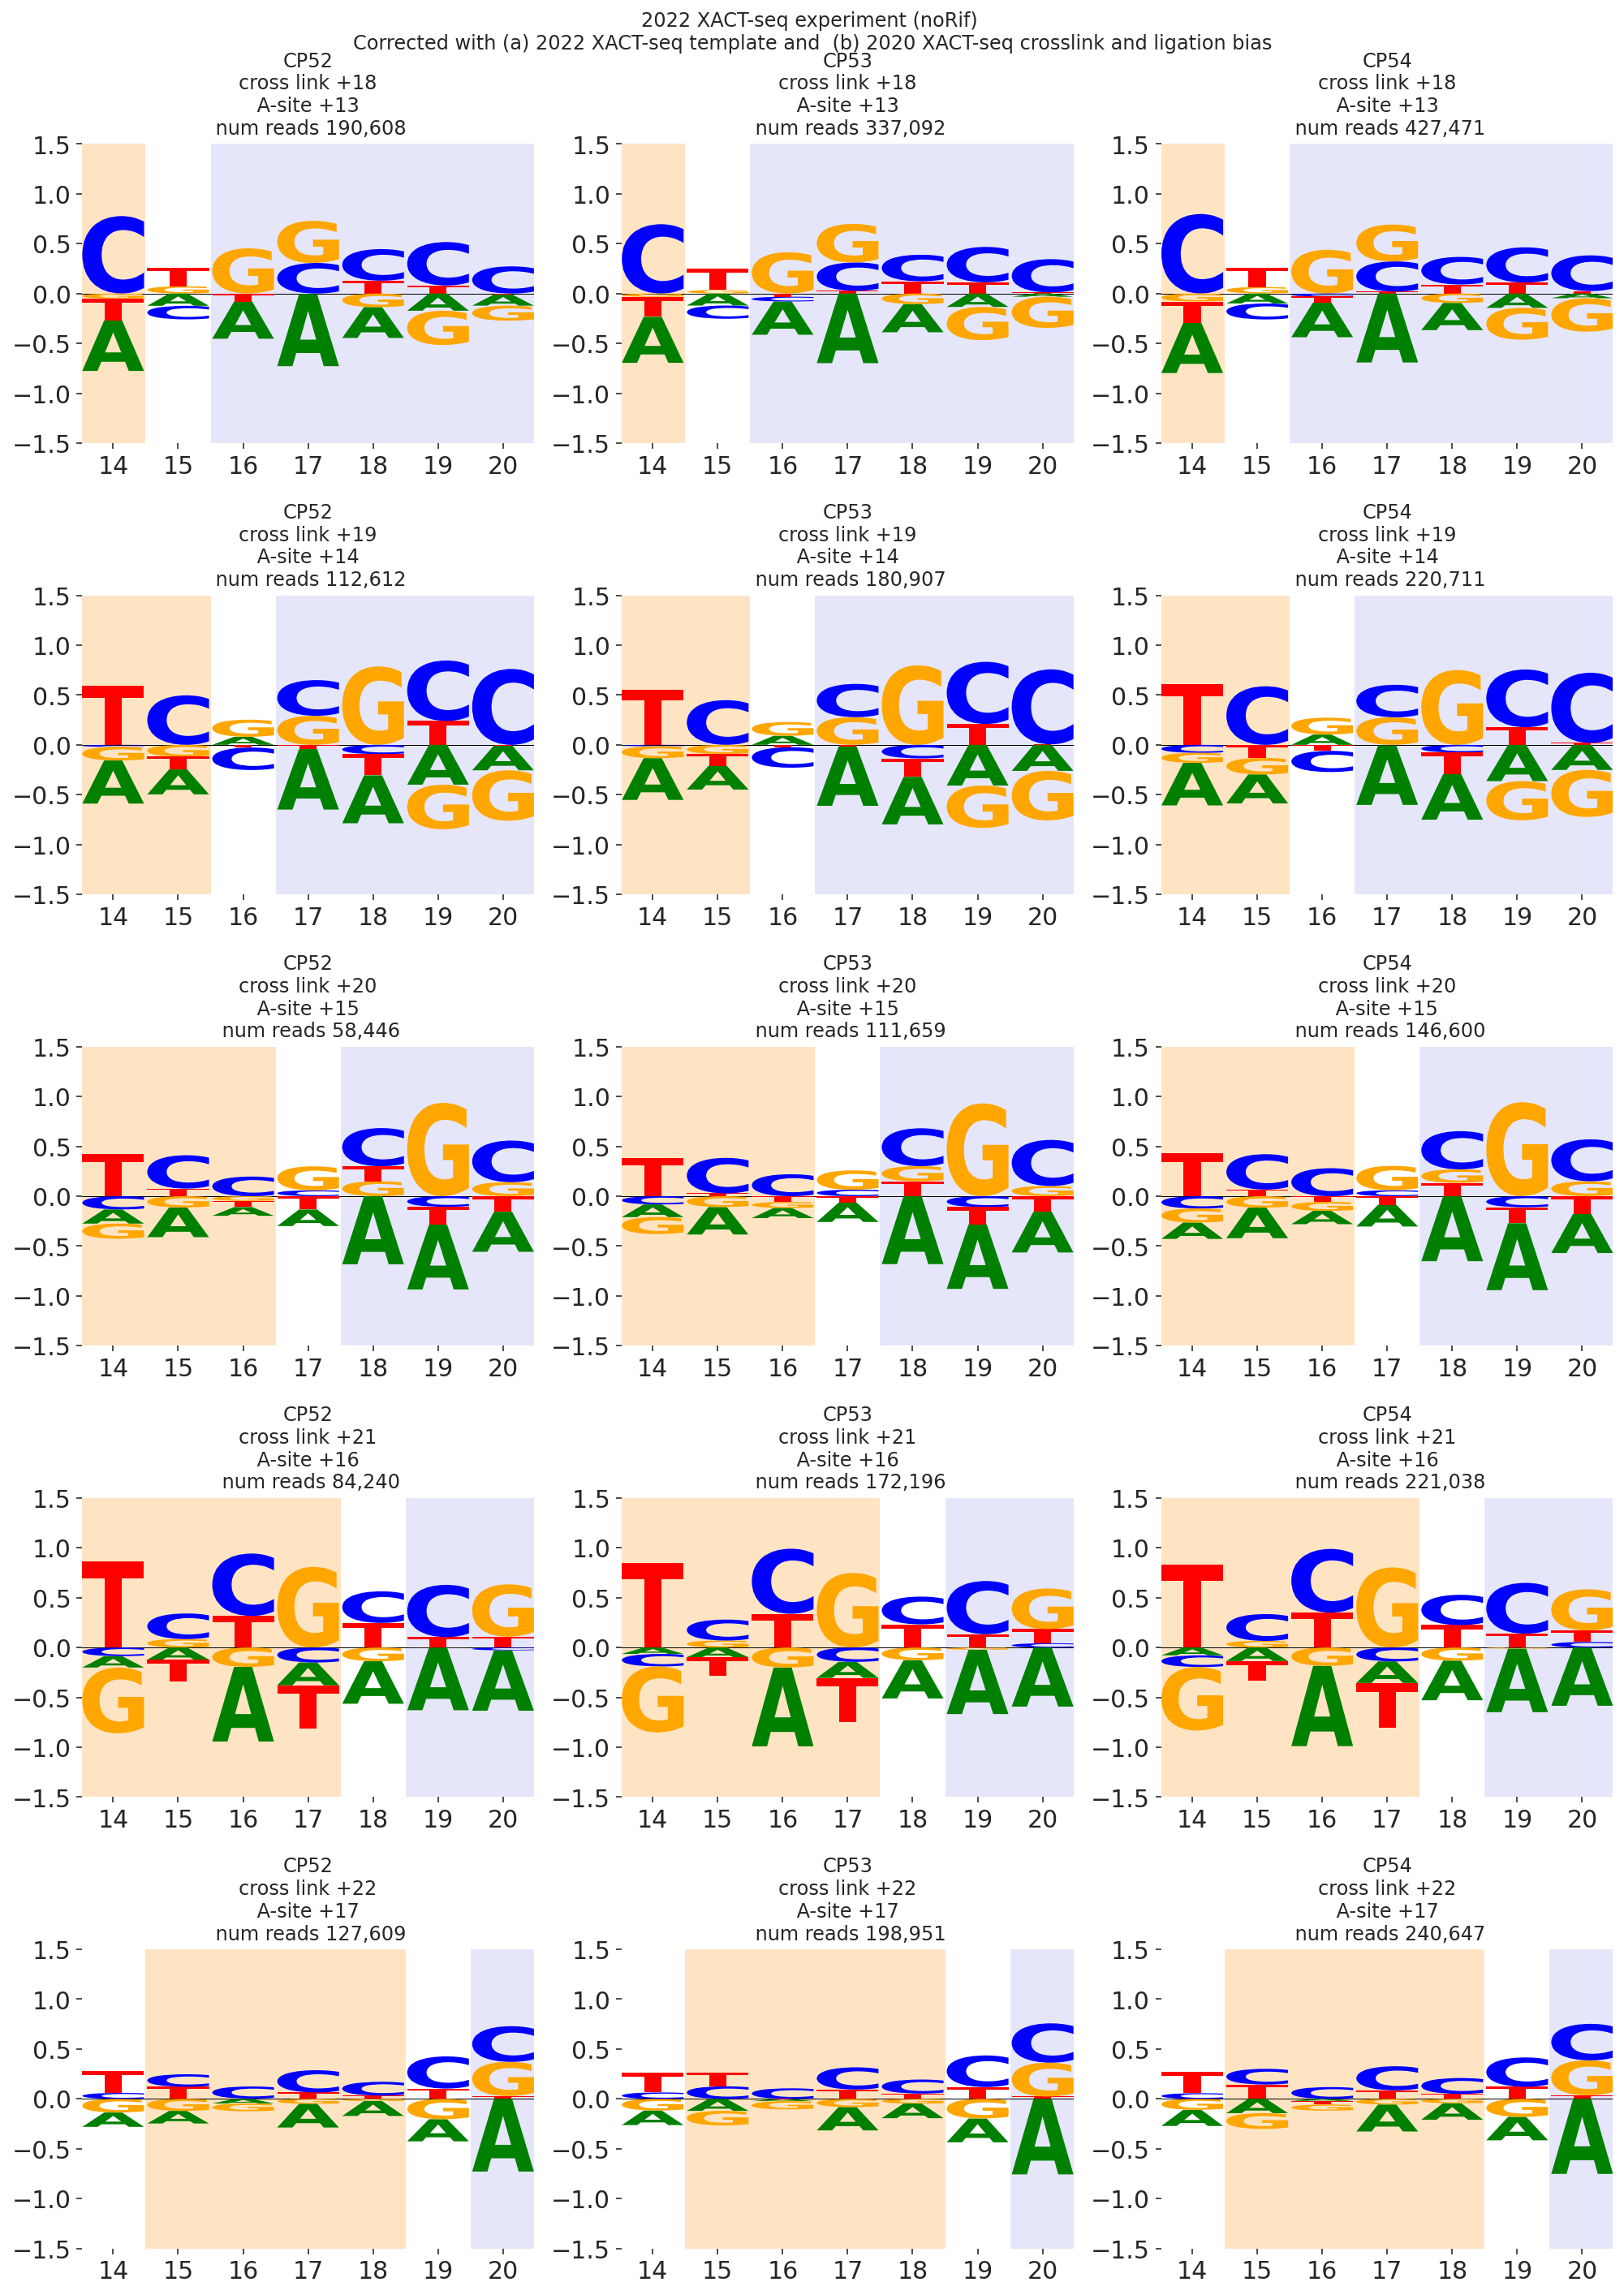

In [9]:
# Draw the rescaled logos for all the replicates for the position [13, 14, 15, 16, 17]
a_loc_range = [13, 14, 15, 16, 17]
fig, axs = plt.subplots(5,3, figsize=(14,20))

for k, sample_name in enumerate(noRif_sample_names):
    print(f'> Reading sample {sample_name}')
    CP_df = pd.read_csv(f'./2022_XACT_seq_data/{sample_name}_rescaled.csv.gz')
    # find number of reads for each position
    num_reads = CP_df.sum(numeric_only=True).to_frame().T
    for i, a_loc in enumerate(a_loc_range):
        ax = axs[i, k]
        plot_signle_pos_logo(ax=ax, a_loc=a_loc, df=CP_df, 
                             num_reads=num_reads, 
                             sample_name=sample_name, 
                             ylim=ylim)

title = (f"2022 XACT-seq experiment (noRif) \n"
          "Corrected with (a) 2022 XACT-seq template and  "
          "(b) 2020 XACT-seq crosslink and ligation bias")
plt.suptitle(title)
plt.tight_layout()
plt.savefig('./2022_XACT_seq_figs/2022_Asite_13-17_all_replicates.pdf')

> Reading sample CP52
> Reading sample CP53
> Reading sample CP54
> Reading sample CP52
> Reading sample CP53
> Reading sample CP54
> Reading sample CP52
> Reading sample CP53
> Reading sample CP54
> Reading sample CP52
> Reading sample CP53
> Reading sample CP54
> Reading sample CP52
> Reading sample CP53
> Reading sample CP54


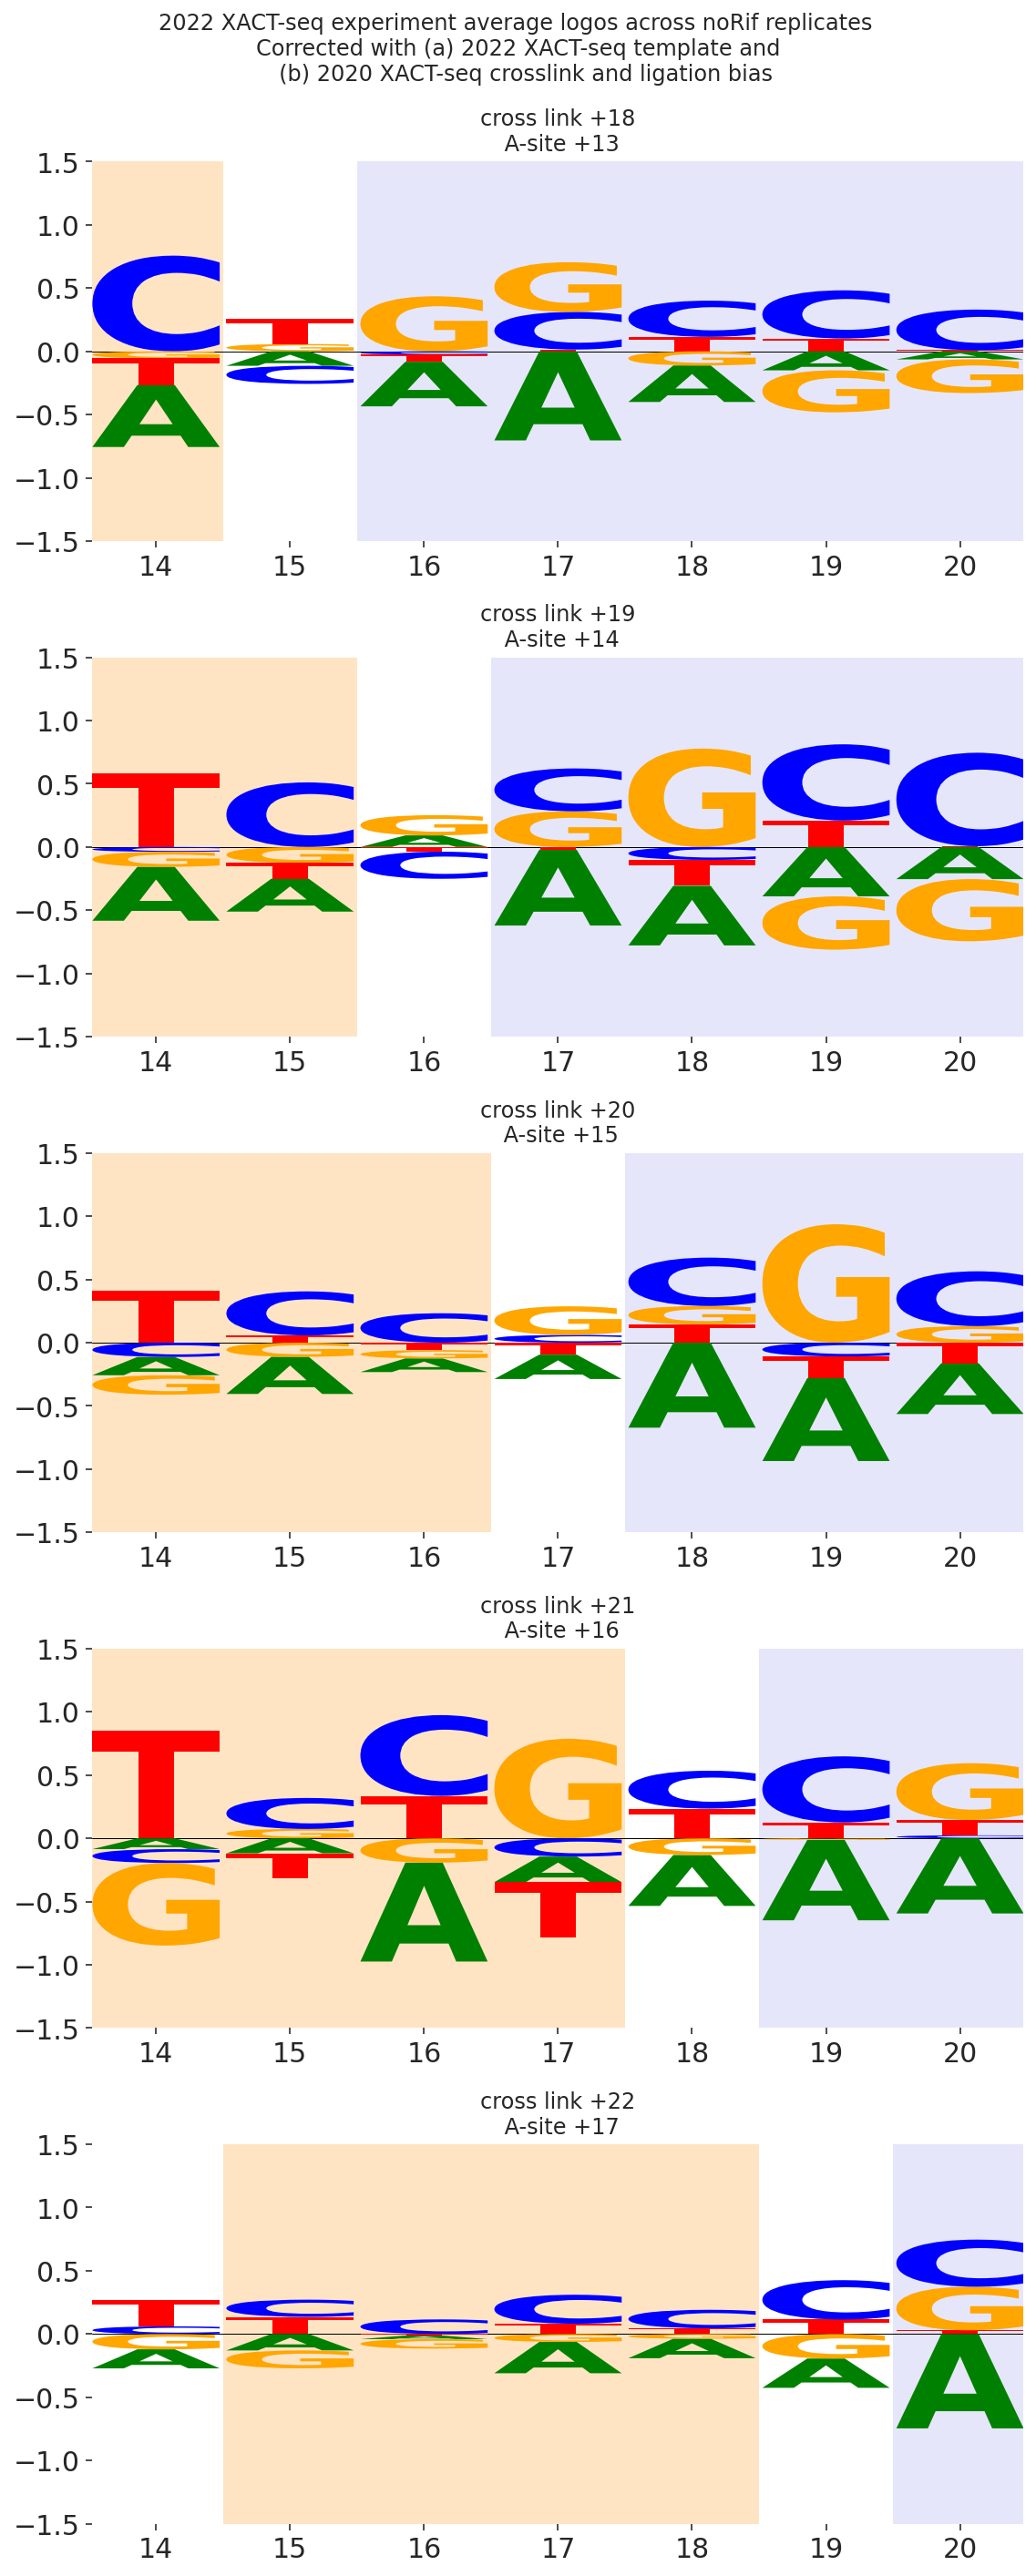

In [10]:
# Draw the rescaled logos for all the replicates for the position [13, 14, 15, 16, 17]
a_loc_range = [13, 14, 15, 16, 17]
fig, axs = plt.subplots(5,1, figsize=(8,20))


for i, a_loc in enumerate(a_loc_range):
    enrich_mat_ave = 0
    ax = axs[i]
    for k, sample_name in enumerate(noRif_sample_names):
        print(f'> Reading sample {sample_name}')
        CP_df = pd.read_csv(f'./2022_XACT_seq_data/{sample_name}_rescaled.csv.gz')
        seqs = CP_df['pe']
        fg_ct = CP_df[str(a_loc)].values
        fg_mat = logomaker.alignment_to_matrix(sequences=seqs, counts=fg_ct,
                                           pseudocount=1)
        enrich_mat = np.log2(fg_mat)
        # Start at +14 instead of 0 for the enrichement matrix
        enrich_mat.index = enrich_mat.index+14
        enrich_mat_ave = enrich_mat_ave+enrich_mat
    enrich_mat_ave = enrich_mat_ave/len(noRif_sample_names)
        
    logo = logomaker.Logo(enrich_mat_ave, 
                          center_values=True, 
                          ax=ax,
                          flip_below=False)
    logo.style_spines(visible=False)
    ax.set_ylim(ylim)
    x_loc = a_loc + 5
    title = f'cross link +{x_loc}\n A-site +{a_loc}'
    ax.set_title(title)
    logo.highlight_position_range(int(x_loc)-2, int(x_loc)+2,
                                  color='lavender',
                                  alpha=1, linewidth=1)
    logo.highlight_position_range(int(x_loc)-7, int(x_loc)-4,
                                  color='bisque',
                                  alpha=1, linewidth=1)
    ax.set_xticks(np.arange(14,21))
title = (f"2022 XACT-seq experiment average logos across noRif replicates \n"
          "Corrected with (a) 2022 XACT-seq template and\n  "
          "(b) 2020 XACT-seq crosslink and ligation bias\n")
plt.suptitle(title)
plt.tight_layout()
plt.savefig('./2022_XACT_seq_figs/2022_average_logos_Asite13-17.pdf')